In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
final_losses = pd.read_csv('final_losses.csv')
training_losses = pd.read_csv('all_losses.csv')

TypeError: yscale() missing 1 required positional argument: 'value'

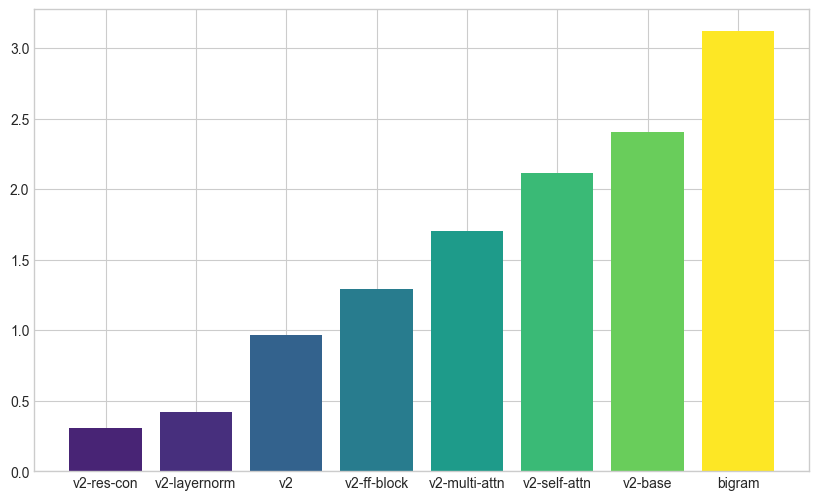

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

data = """model,final_loss
bigram,3.1204
v2-base,2.402
v2-self-attn,2.1176
v2-multi-attn,1.7003
v2-ff-block,1.293
v2-res-con,0.3075
v2-layernorm,0.4224
v2,0.9686"""

df = pd.read_csv(pd.io.common.StringIO(data))

# Sort the data by final_loss in ascending order
df = df.sort_values(by='final_loss')

# Create the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(df['model'], df['final_loss'], color=plt.cm.viridis(df['final_loss'] / df['final_loss'].max()))
plt.yscale()
plt.title('Final Loss of Different Models (Log Scale)')
plt.xlabel('Model')
plt.ylabel('Final Loss (Log Scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Label each bar with its loss value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom', fontsize=9)

plt.savefig('model_final_loss_bar_chart_with_labels.png')

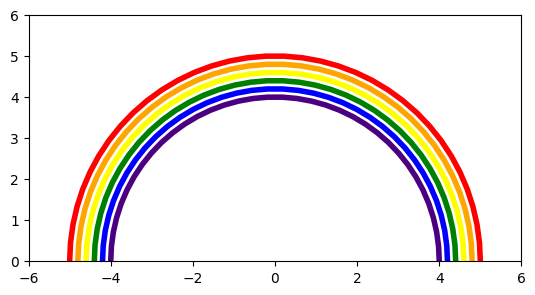

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import LineCollection

colors = ["indigo", "blue", "green", "yellow", "orange", "red"]

# create a list of half-circles with varying radii
theta = np.linspace(0, np.pi, 36)
radii = np.linspace(4, 5, num=len(colors))
arcs = [np.column_stack([r * np.cos(theta), r * np.sin(theta)]) for r in radii]

fig, ax = plt.subplots(figsize=(6.4, 3.2))
# set axes limits manually because Collections do not take part in autoscaling
ax.set_xlim(-6, 6)
ax.set_ylim(0, 6)
ax.set_aspect("equal")  # to make the arcs look circular

# create a LineCollection with the half-circles
# its properties can be set per line by passing a sequence (here used for *colors*)
# or they can be set for all lines by passing a scalar (here used for *linewidths*)
line_collection = LineCollection(arcs, colors=colors, linewidths=4)
ax.add_collection(line_collection)

plt.show()

In [53]:
arcs[0]

array([[ 4.00000000e+00,  0.00000000e+00],
       [ 3.98389718e+00,  3.58557236e-01],
       [ 3.93571835e+00,  7.14227579e-01],
       [ 3.85585144e+00,  1.06414738e+00],
       [ 3.74493948e+00,  1.40549930e+00],
       [ 3.60387547e+00,  1.73553496e+00],
       [ 3.43379517e+00,  2.05159711e+00],
       [ 3.23606798e+00,  2.35114101e+00],
       [ 3.01228586e+00,  2.63175490e+00],
       [ 2.76425060e+00,  2.89117946e+00],
       [ 2.49395921e+00,  3.12732593e+00],
       [ 2.20358793e+00,  3.33829301e+00],
       [ 1.89547465e+00,  3.52238213e+00],
       [ 1.57210013e+00,  3.67811109e+00],
       [ 1.23606798e+00,  3.80422607e+00],
       [ 8.90083736e-01,  3.89971165e+00],
       [ 5.36933063e-01,  3.96379905e+00],
       [ 1.79459321e-01,  3.99597227e+00],
       [-1.79459321e-01,  3.99597227e+00],
       [-5.36933063e-01,  3.96379905e+00],
       [-8.90083736e-01,  3.89971165e+00],
       [-1.23606798e+00,  3.80422607e+00],
       [-1.57210013e+00,  3.67811109e+00],
       [-1.

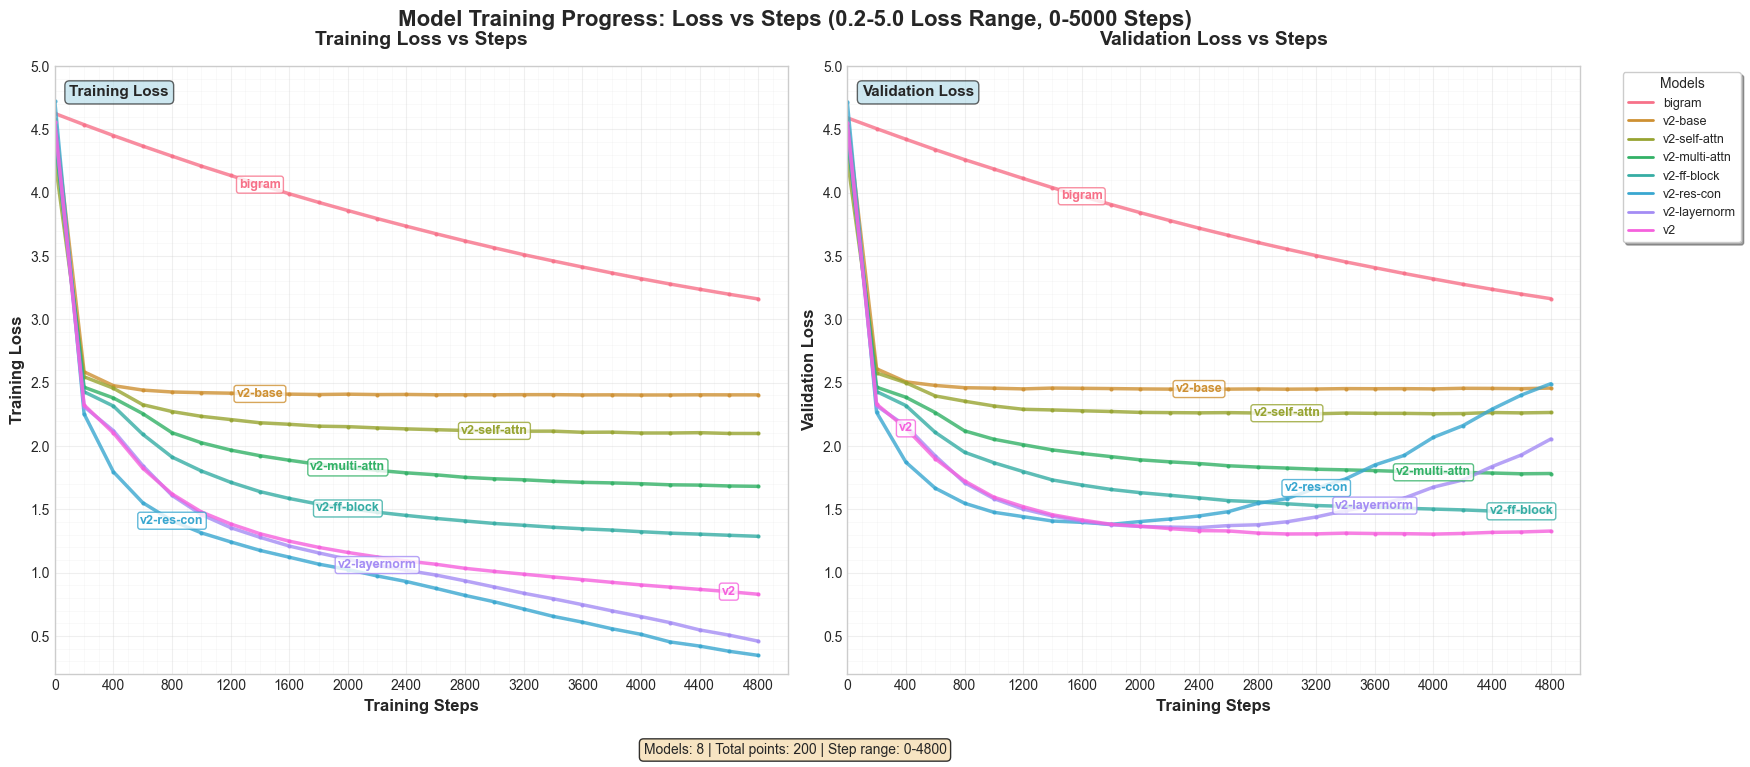


=== Training Progress Summary ===
Data filtered to: Loss [0.2, 5.0], Steps [0, 5000]
Models analyzed: 8
Total data points: 200

DETAILED MODEL COMPARISON

🔹 bigram:
   Steps: 0 → 4,800 (25 points)
   Training:   4.625 → 3.161 (best: 3.161, Δ: +1.465)
   Validation: 4.591 → 3.163 (best: 3.163, Δ: +1.428)
   ✅ Train-Val gap: 0.002 (good generalization)

🔹 v2-base:
   Steps: 0 → 4,800 (25 points)
   Training:   4.579 → 2.404 (best: 2.403, Δ: +2.176)
   Validation: 4.589 → 2.457 (best: 2.449, Δ: +2.131)
   ✅ Train-Val gap: 0.054 (good generalization)

🔹 v2-self-attn:
   Steps: 0 → 4,800 (25 points)
   Training:   4.269 → 2.099 (best: 2.099, Δ: +2.170)
   Validation: 4.270 → 2.264 (best: 2.254, Δ: +2.006)
   ⚠️  Train-Val gap: 0.166 (potential overfitting)

🔹 v2-multi-attn:
   Steps: 0 → 4,800 (25 points)
   Training:   4.455 → 1.681 (best: 1.681, Δ: +2.774)
   Validation: 4.456 → 1.783 (best: 1.781, Δ: +2.673)
   ⚠️  Train-Val gap: 0.101 (potential overfitting)

🔹 v2-ff-block:
   Steps: 0

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import random

# Set style for better aesthetics
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Filter data for specified ranges
filtered_data = training_losses[
    (training_losses['step'] <= 5000) & 
    ((training_losses['train_loss'] >= 0.2) & (training_losses['train_loss'] <= 5.0)) &
    ((training_losses['val_loss'] >= 0.2) & (training_losses['val_loss'] <= 5.0))
].copy()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), dpi=100)

# Get unique models and assign colors
unique_models = filtered_data['model'].unique()
colors = sns.color_palette("husl", len(unique_models))
color_map = dict(zip(unique_models, colors))

def plot_with_labels(ax, x_data, y_data, color, model_name, loss_type):
    """Plot line with direct labels on the line"""
    # Convert to numpy arrays to avoid pandas indexing issues
    x_vals = np.array(x_data.values if hasattr(x_data, 'values') else x_data)
    y_vals = np.array(y_data.values if hasattr(y_data, 'values') else y_data)
    
    # Remove any NaN values
    valid_mask = ~(np.isnan(x_vals) | np.isnan(y_vals))
    x_vals = x_vals[valid_mask]
    y_vals = y_vals[valid_mask]
    
    if len(x_vals) == 0:
        return  # Skip if no valid data
    
    # Sort data by x values
    sorted_indices = np.argsort(x_vals)
    x_sorted = x_vals[sorted_indices]
    y_sorted = y_vals[sorted_indices]
    
    # Plot the line
    line = ax.plot(x_sorted, y_sorted, 
                   color=color, 
                   linewidth=2.5, 
                   alpha=0.8,
                   marker='o', 
                   markersize=2, 
                   markevery=max(1, len(x_sorted)//25))
    
    # Add label directly on the line
    if len(x_sorted) > 5:  # Only add label if we have enough points
        # Find a good position for the label (around 70% of the way through)
        label_idx = min(int(len(x_sorted) * random.random()), len(x_sorted) - 1)
        label_x = x_sorted[label_idx]
        label_y = y_sorted[label_idx]
        
        # Add text label with background
        ax.text(label_x, label_y, model_name, 
                color=color, fontweight='bold', fontsize=9,
                bbox=dict(boxstyle="round,pad=0.2", facecolor='white', 
                         edgecolor=color, alpha=0.8),
                ha='center', va='center')

# Plot Training Loss
ax1.set_title('Training Loss vs Steps', fontsize=14, fontweight='bold', pad=15)
for i, model_name in enumerate(unique_models):
    model_data = filtered_data[filtered_data['model'] == model_name].sort_values('step').reset_index(drop=True)
    
    if len(model_data) > 0 and 'train_loss' in model_data.columns:
        # Check for valid data
        valid_data = model_data.dropna(subset=['step', 'train_loss'])
        if len(valid_data) > 0:
            plot_with_labels(ax1, valid_data['step'], valid_data['train_loss'], 
                            colors[i], model_name, 'train')

# Plot Validation Loss
ax2.set_title('Validation Loss vs Steps', fontsize=14, fontweight='bold', pad=15)
for i, model_name in enumerate(unique_models):
    model_data = filtered_data[filtered_data['model'] == model_name].sort_values('step').reset_index(drop=True)
    
    if len(model_data) > 0 and 'val_loss' in model_data.columns:
        # Check for valid data
        valid_data = model_data.dropna(subset=['step', 'val_loss'])
        if len(valid_data) > 0:
            plot_with_labels(ax2, valid_data['step'], valid_data['val_loss'], 
                            colors[i], model_name, 'val')

# Configure both subplots
for ax, loss_type in zip([ax1, ax2], ['Training', 'Validation']):
    # Set axis limits
    ax.set_xlim(0, 5000)
    ax.set_ylim(0.2, 5.0)
    
    # Customize tick spacing
    ax.xaxis.set_major_locator(MultipleLocator(400))   # Every 200 steps
    ax.xaxis.set_minor_locator(MultipleLocator(100))   
    ax.yaxis.set_major_locator(MultipleLocator(0.5))   
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))   
    
    # Labels
    ax.set_xlabel('Training Steps', fontsize=12, fontweight='bold')
    ax.set_ylabel(f'{loss_type} Loss', fontsize=12, fontweight='bold')
    
    # Enhance grid
    ax.grid(True, alpha=0.3, linewidth=0.8)
    ax.grid(True, which='minor', alpha=0.15, linewidth=0.5)
    
    # Add trend indication
    ax.text(0.02, 0.95, f'{loss_type} Loss', 
            transform=ax.transAxes, fontsize=11, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.6))

# Add overall title
fig.suptitle('Model Training Progress: Loss vs Steps (0.2-5.0 Loss Range, 0-5000 Steps)', 
             fontsize=16, fontweight='bold', y=0.95)

# Add statistics box to the figure
if len(unique_models) > 0:
    stats_text = f"Models: {len(unique_models)} | "
    stats_text += f"Total points: {len(filtered_data)} | "
    stats_text += f"Step range: {filtered_data['step'].min()}-{filtered_data['step'].max()}"
    
    fig.text(0.5, 0.02, stats_text, ha='center', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="wheat", alpha=0.8))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.88, bottom=0.12)

# Add a small legend as backup (in case labels are hard to read)
# Create a small legend in the top right
legend_elements = [plt.Line2D([0], [0], color=colors[i], lw=2, label=model) 
                   for i, model in enumerate(unique_models)]

# Add legend to the second subplot
ax2.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', 
           frameon=True, fancybox=True, shadow=True,
           fontsize=9, title='Models', title_fontsize=10)

plt.show()

# Print detailed summary statistics
print("\n=== Training Progress Summary ===")
print(f"Data filtered to: Loss [{0.2:.1f}, {5.0:.1f}], Steps [0, {5000}]")
print(f"Models analyzed: {len(unique_models)}")
print(f"Total data points: {len(filtered_data)}")

if len(unique_models) > 0:
    print("\n" + "="*80)
    print("DETAILED MODEL COMPARISON")
    print("="*80)
    
    for model_name in unique_models:
        model_data = filtered_data[filtered_data['model'] == model_name].sort_values('step')
        if len(model_data) == 0:
            continue
            
        print(f"\n🔹 {model_name}:")
        print(f"   Steps: {model_data['step'].min():,} → {model_data['step'].max():,} ({len(model_data)} points)")
        
        # Training loss stats
        train_initial = model_data['train_loss'].iloc[0]
        train_final = model_data['train_loss'].iloc[-1]
        train_best = model_data['train_loss'].min()
        train_improvement = train_initial - train_final
        
        print(f"   Training:   {train_initial:.3f} → {train_final:.3f} (best: {train_best:.3f}, Δ: {train_improvement:+.3f})")
        
        # Validation loss stats
        val_initial = model_data['val_loss'].iloc[0]
        val_final = model_data['val_loss'].iloc[-1]
        val_best = model_data['val_loss'].min()
        val_improvement = val_initial - val_final
        
        print(f"   Validation: {val_initial:.3f} → {val_final:.3f} (best: {val_best:.3f}, Δ: {val_improvement:+.3f})")
        
        # Overfitting check
        gap = abs(train_final - val_final)
        if gap > 0.1:
            print(f"   ⚠️  Train-Val gap: {gap:.3f} (potential overfitting)")
        else:
            print(f"   ✅ Train-Val gap: {gap:.3f} (good generalization)")
    
    # Overall best models
    print(f"\n{'='*50}")
    print("🏆 BEST PERFORMERS:")
    final_train = filtered_data.groupby('model')['train_loss'].last().sort_values()
    final_val = filtered_data.groupby('model')['val_loss'].last().sort_values()
    
    print(f"   Best Training Loss:   {final_train.index[0]} ({final_train.iloc[0]:.3f})")
    print(f"   Best Validation Loss: {final_val.index[0]} ({final_val.iloc[0]:.3f})")

In [74]:
model


['bigram',
 'v2-base',
 'v2-self-attn',
 'v2-multi-attn',
 'v2-ff-block',
 'v2-res-con',
 'v2-layernorm',
 'v2']